# Vote Data Analysis from 2002 Irish General Election e-voting trial - Meath

In [1]:
#read vote data from csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 

%matplotlib inline

#input file
#constituency="DublinNorth2002"
#constituency="DublinWest2002"
constituency="Meath2002"
my_csv='../data/'+constituency+'.csv'

#read in data (setting 1st row as header)
df = pd.read_csv(my_csv, na_values=["Missing"], header=[0])

#set column names as first line

#df.head()
print("Print Data Frame (df.head)")
print(df.head(10))
print("Print Column names")
print(df.columns)

#drop the numbers column (#df=df.drop(['No.'], 1))
df = df.drop(df.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
#reset index to start a 1 and not 0
df.index = df.index + 1

Print Data Frame (df.head)
   No.   FF   FG   NP  FF.1  FG.1  FG.2  NPL  NP.1  NP.2    GP   NPR    SF  \
0    1  NaN  NaN  NaN   3.0   2.0   NaN  NaN   NaN   NaN   1.0   NaN   NaN   
1    2  NaN  2.0  NaN   NaN   3.0   NaN  1.0   NaN   NaN   NaN   NaN   NaN   
2    3  NaN  1.0  8.0   NaN   2.0   3.0  7.0   6.0   5.0   4.0   NaN   NaN   
3    4  1.0  4.0  7.0   2.0   5.0   8.0  9.0  10.0  11.0  12.0  13.0  14.0   
4    5  NaN  4.0  NaN   NaN   1.0   3.0  5.0   NaN   6.0   NaN   NaN   NaN   
5    6  NaN  1.0  NaN   7.0   2.0   3.0  6.0   NaN   NaN   5.0   NaN   NaN   
6    7  1.0  NaN  NaN   2.0   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
7    8  NaN  2.0  NaN   NaN   3.0   NaN  4.0   NaN   NaN   NaN   NaN   NaN   
8    9  NaN  NaN  NaN   1.0   NaN   NaN  3.0   NaN   NaN   NaN   NaN   NaN   
9   10  NaN  2.0  NaN   NaN   NaN   1.0  NaN   4.0   NaN   3.0   NaN   NaN   

   FF.2   LB  
0   NaN  NaN  
1   4.0  NaN  
2   NaN  NaN  
3   3.0  6.0  
4   NaN  2.0  
5   NaN  4.0  
6   3.0  

# Election Dataset Describe and Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64081 entries, 1 to 64081
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FF      30776 non-null  float64
 1   FG      30216 non-null  float64
 2   NP      6996 non-null   float64
 3   FF.1    36063 non-null  float64
 4   FG.1    28888 non-null  float64
 5   FG.2    22456 non-null  float64
 6   NPL     20457 non-null  float64
 7   NP.1    11760 non-null  float64
 8   NP.2    11352 non-null  float64
 9   GP      18198 non-null  float64
 10  NPR     5322 non-null   float64
 11  SF      19996 non-null  float64
 12  FF.2    33949 non-null  float64
 13  LB      21677 non-null  float64
dtypes: float64(14)
memory usage: 6.8 MB


In [3]:
df.describe()

,FF,FG,NP,FF.1,FG.1,FG.2,NPL,NP.1,NP.2,GP,NPR,SF,FF.2,LB
count,30776.000000,30216.000000,6996.000000,36063.000000,28888.000000,22456.000000,20457.000000,11760.000000,11352.000000,18198.000000,5322.000000,19996.000000,33949.000000,21677.000000
mean,3.028919,3.006354,7.277301,2.631478,3.132858,3.754943,4.019358,5.415051,5.616279,4.388999,8.844044,3.689988,2.964447,4.221571
std,2.404709,2.183754,3.596361,2.151674,2.202823,2.635087,2.604563,3.162481,3.277446,2.731216,3.676716,3.302285,2.241884,2.561378
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,6.000000,1.000000,1.000000,2.000000
50%,3.000000,2.000000,7.000000,2.000000,3.000000,3.000000,4.000000,5.000000,5.000000,4.000000,9.000000,3.000000,2.000000,4.000000
75%,3.000000,4.000000,10.000000,3.000000,4.000000,5.000000,5.000000,8.000000,8.000000,6.000000,12.000000,4.000000,3.000000,5.000000
max,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000


# Statistics on election - candidates and votes

In [4]:
#Stats No. of Candidates(columns) and Votes(rows), all combinations of candidates = candidates!
print("Statistics on Dataframe")
candidates = len(df.columns)
print("No. of Candidates = ", candidates)
votes = len(df.index)
print("No. of Votes = ", votes)
print("No. of all possible Combinations (candidates)! = ", math.factorial(candidates))

Statistics on Dataframe
No. of Candidates =  14
No. of Votes =  64081
No. of all possible Combinations (candidates)! =  87178291200


## Additional Statistics on Actual Vote Data

In [5]:
import statistics as stats
df.head()
#print(df.describe())
df.max()
# find the maximum values of each row (the highest vote preference cast)
maxValues = df.max(axis = 1)
#print(maxValues)
#mean - average 
print(f"Average(Mean) value = {stats.mean(maxValues)}")
#mode - most frequent occuring value
print(f"Mode(most often number of votes cast = {stats.mode(maxValues)}")
#median - middle value
print(f"Middle value of votes cast = {stats.median(maxValues)}")


Average(Mean) value = 4.652018539036532
Mode(most often number of votes cast = 3.0
Middle value of votes cast = 4.0


## Calculate maximum values (number of preferences) for each vote(row)

In [6]:
#add a column of the maximum count of the rows(highest preference vote cast)
df['maxValues'] = df.max(axis = 1)

In [7]:
mval=(df['maxValues'].value_counts())
mval.sort_index(ascending=True, inplace=True)
print(mval.values)
print(mval.index)

[ 3184  4250 21102 12004  8347  4866  2627  1736  1053   880   425   441
   676  2490]
Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
              13.0, 14.0],
             dtype='float64')


# Plot Histogram of the number of transfers a voter casts

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
              13.0, 14.0],
             dtype='float64')
[ 3184  4250 21102 12004  8347  4866  2627  1736  1053   880   425   441
   676  2490]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


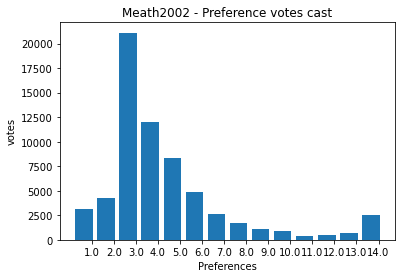

In [8]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

#counts = Counter(word_list)
#labels, values = zip(*counts.items())
# sort your values in descending order
#indSort = np.argsort(values)[::-1]

# rearrange your data
labels=mval.index
values=mval.values
indexes = np.arange(len(labels))
print(labels)
print(values)
print(indexes)

bar_width = 0.35

# Add title and axis names
plt.title(constituency+' - Preference votes cast')
plt.xlabel('Preferences')
plt.ylabel('votes')

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)


# Save the histogram
plt.savefig('../images/'+constituency+'hist.png')

#show histogram
plt.show()

###Pie Chart of how many preferences a voter uses

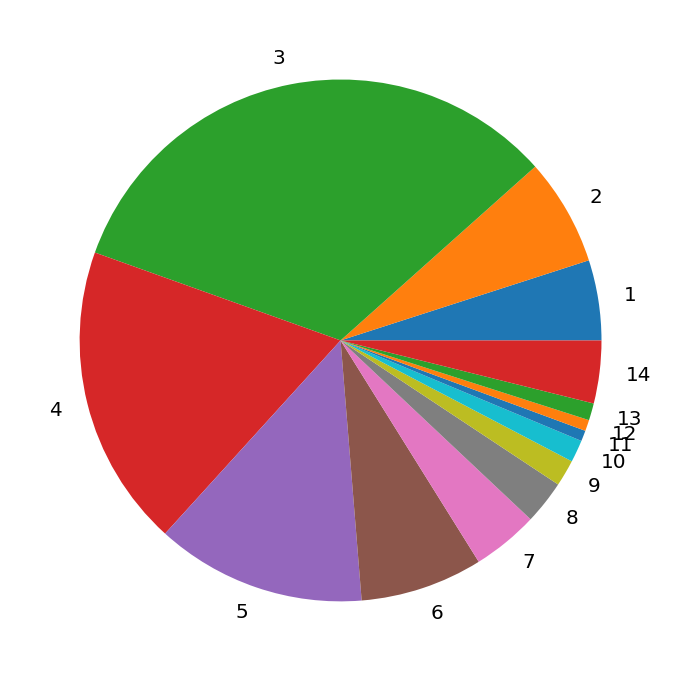

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Set the figure size - handy for larger output
#from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

pieLabels=[]
for lab in indexes:
    pieLabels.append(lab+1)

plt.pie(values, labels = pieLabels)

# Save the Pie
plt.savefig('../images/'+constituency+'_pref_cast_pie.png')

plt.show()

In [10]:
nPrList =[]
for i in range(1,candidates+1):
    nPrList.append(int(math.factorial(candidates)/(math.factorial(candidates-i))))
print(nPrList)

[14, 182, 2184, 24024, 240240, 2162160, 17297280, 121080960, 726485760, 3632428800, 14529715200, 43589145600, 87178291200, 87178291200]


## Print number of preferences cast, and calculate percentage

In [11]:
# creating the dataframe from dictionary
d={"Pref": labels, "Votes": values}    
dfpref = pd.DataFrame(d)

#calculate percentage of preferences cast and add to dataframe
votz = dfpref.Votes.sum()  
dfpref['Percentage'] = round(((dfpref['Votes']/votz)*100), 1)

#calculate possible nPr = n!/(n-r)! values for each preference vote
# candidates = n. No. of pref = r
nPrList =[]
for i in range(1,candidates+1):
    nPrList.append(int(math.factorial(candidates)/(math.factorial(candidates-i))))
#add nPr to dataframe    
dfpref['nPr'] = nPrList

# displaying the dataframe
display(dfpref)

,Pref,Votes,Percentage,nPr
0,1.0,3184,5.0,14
1,2.0,4250,6.6,182
2,3.0,21102,32.9,2184
3,4.0,12004,18.7,24024
4,5.0,8347,13.0,240240
5,6.0,4866,7.6,2162160
6,7.0,2627,4.1,17297280
7,8.0,1736,2.7,121080960
8,9.0,1053,1.6,726485760
9,10.0,880,1.4,3632428800


# Calculate number of duplicated vote sequences

In [12]:
print((~df.duplicated()).sum())
print(df.duplicated(keep='last').value_counts())

25101
True     38980
False    25101
dtype: int64


In [13]:
#drop all dublicate rows keeping last one
df.drop_duplicates(keep='last', inplace=True, subset=df.columns.difference(['maxValues']))

In [14]:
#print the number of votes, and the number of unique votes
print(f"Number of votes {votes}")
print(f"Number of unique vote patterns (after removing duplicates) {len(df)}")

Number of votes 64081
Number of unique vote patterns (after removing duplicates) 25101


In [15]:
# after removal of duplicates
#add a column of the maximum count of the rows(highest preference vote cast)
df['maxValues'] = df.max(axis = 1)

mval=(df['maxValues'].value_counts())
mval.sort_index(ascending=True, inplace=True)

### calculate unique vote combinations for each preference cast 

In [16]:
#calculate unique vote combinations for each preference cast 
dfpref['Unique Votes'] = mval.values

dfpref['Percentage Used'] = round(((dfpref['Unique Votes']/dfpref['nPr'])*100), 5)

# displaying the dataframe
display(dfpref)

,Pref,Votes,Percentage,nPr,Unique Votes,Percentage Used
0,1.0,3184,5.0,14,14,100.00000
1,2.0,4250,6.6,182,165,90.65934
2,3.0,21102,32.9,2184,1419,64.97253
3,4.0,12004,18.7,24024,3744,15.58442
4,5.0,8347,13.0,240240,5321,2.21487
5,6.0,4866,7.6,2162160,4249,0.19652
6,7.0,2627,4.1,17297280,2543,0.01470
7,8.0,1736,2.7,121080960,1703,0.00141
8,9.0,1053,1.6,726485760,1047,0.00014
9,10.0,880,1.4,3632428800,877,0.00002


In [17]:
#just checking 
print(sum(mval.values))
nPr=dfpref['nPr']

25101


## Import in Political Compass data for Irish Parties

In [18]:
#download compass data positioning irish political parties on the political spectrum
pcData='../data/pc.csv'

#set column names
col_names = ['party', 'xaxis', 'yaxis']
#read in political compass data
dfPC = pd.read_csv(pcData, na_values=["Missing"], names=col_names)
print("Irish Parties on Political Compass")
print(dfPC)
points=[]
points = dfPC.party
x=[] #x-axis coordinates
y=[] #y-axis coordinates
pt=[]

#populate two lists with the x and y - coordinates
for p in points:
    pt.append(dfPC.party)
    x.append(dfPC.xaxis)
    y.append(dfPC.yaxis)

Irish Parties on Political Compass
  party  xaxis  yaxis
0    SP   -7.0   -2.5
1    SF   -4.5    1.0
2    GP   -1.0   -2.0
3    NP    0.0    0.0
4    LB    1.5   -0.5
5    FF    2.5    2.4
6    FG    3.5    2.5
7    PD    4.0    3.0


In [19]:
# get the party initials (1 characters) from the column names i.e. remove .1 .2 L Retc
#print(df.columns)
partiesList= list(df.columns)
del partiesList[-1]
print(partiesList)
partiesList2=[]
for pl in partiesList:
    #print(pl[:2] )
    partiesList2.append(pl[:2])
print(partiesList2)

['FF', 'FG', 'NP', 'FF.1', 'FG.1', 'FG.2', 'NPL', 'NP.1', 'NP.2', 'GP', 'NPR', 'SF', 'FF.2', 'LB']
['FF', 'FG', 'NP', 'FF', 'FG', 'FG', 'NP', 'NP', 'NP', 'GP', 'NP', 'SF', 'FF', 'LB']


In [20]:
def getEuclidVoteDetails(voteRow, dfPC):
    #populate 3 lists with text, x co-ord and y co-ord
    partyPCList = dfPC.party.tolist()
   # print("partyList",partyPCList)
    xi=[]
    yi=[]
    pp=[]
    for d in voteRow:
        inx=partyPCList.index(d)
        pp.append(dfPC.iloc[inx].tolist()[0])
        xi.append(dfPC.iloc[inx].tolist()[1])
        yi.append(dfPC.iloc[inx].tolist()[2])

   # for ip in range(len(pp)):
   #     print(f"{ip+1} - {pp[ip]} ({xi[ip]}, {yi[ip]})")

    #Calculate the eculidean distance a vote travels on the political spectrum
    dist = 0
    total_dist=0
    big_dist=0
    for pl in range(len(pp)):
    # initializing points in # numpy arrays      
        if pl != (len(pp)-1):
            point1 = np.array((xi[pl],yi[pl]))
            point2 = np.array((xi[pl+1],yi[pl+1]))

    #calculating Euclidean distance # using linalg.norm()
            dist = np.linalg.norm(point1 - point2)
            #print(f"Euclidean distance between vote {pl+1} and {pl+2} is {dist}")
            total_dist = total_dist + dist
            if dist > big_dist:
                big_dist=dist
 #   print(total_dist, len(pp))
    if len(pp) > 1:
        avg_dist = total_dist/(len(pp)-1)    
    else:
        avg_dist = total_dist
    #print("Total Distance Travelled on Political Compass as a vote transfers ", total_dist)
    #print("Average Distance Travelled on Political Compass of each vote transfers ", avg_dist)

    return(total_dist, avg_dist, big_dist)

In [21]:
def getVotesParty(voterow, partieslegend):
    #convert a vote row into parties initials
    voteP=[]
    for v in range(len(voterow)):
        for w in range(len(voterow)):
            if voterow[w] == v+1:
                voteP.append(partieslegend[w])
    return(voteP)

In [22]:
#calculate the euclidean distance for all rows
EuclidDist = []
AvgEucDist =[]
BiggestDist =[]
for dft5 in range(len(df)):
    #print(dft5)
    dftR = list(df.iloc[dft5])
    del dftR[-1]
    #print("Call get Votes for Party in row")
    votePList=getVotesParty(dftR, partiesList2)
    #print(votePList)
    (tD, aD, bD) = getEuclidVoteDetails(votePList, dfPC)
    #print(tD, aD)
    EuclidDist.append(tD)
    AvgEucDist.append(aD)
    BiggestDist.append(bD)
    
#print(EuclidDist)
#print(AvgEucDist)
#print(type(EuclidDist))
df['Euclid Dist'] = np.array(EuclidDist)
df['Avg. Euc. Dist'] = np.array(AvgEucDist)
df['Biggest Dist'] = np.array(BiggestDist)
display(df.tail(10))


,FF,FG,NP,FF.1,FG.1,FG.2,NPL,NP.1,NP.2,GP,NPR,SF,FF.2,LB,maxValues,Euclid Dist,Avg. Euc. Dist,Biggest Dist
64072,NaN,2.0,NaN,NaN,1.0,5.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,5.0,12.884988,3.221247,6.363961
64073,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,0.000000,0.000000,0.000000
64074,4.0,6.0,14.0,5.0,9.0,10.0,12.0,1.0,2.0,11.0,13.0,8.0,3.0,7.0,14.0,31.000181,2.384629,8.139410
64075,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,0.000000,0.000000,0.000000
64076,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.004988,1.004988,1.004988
64077,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,4.0,5.0,5.0,15.317114,3.829279,5.622277
64078,NaN,3.0,7.0,NaN,1.0,4.0,2.0,8.0,6.0,NaN,NaN,NaN,5.0,NaN,8.0,13.072858,1.867551,4.301163
64079,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000
64080,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,9.144398,4.572199,8.139410
64081,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.004988,1.004988,1.004988


Text(0.5, 0, 'Euclid Distance')

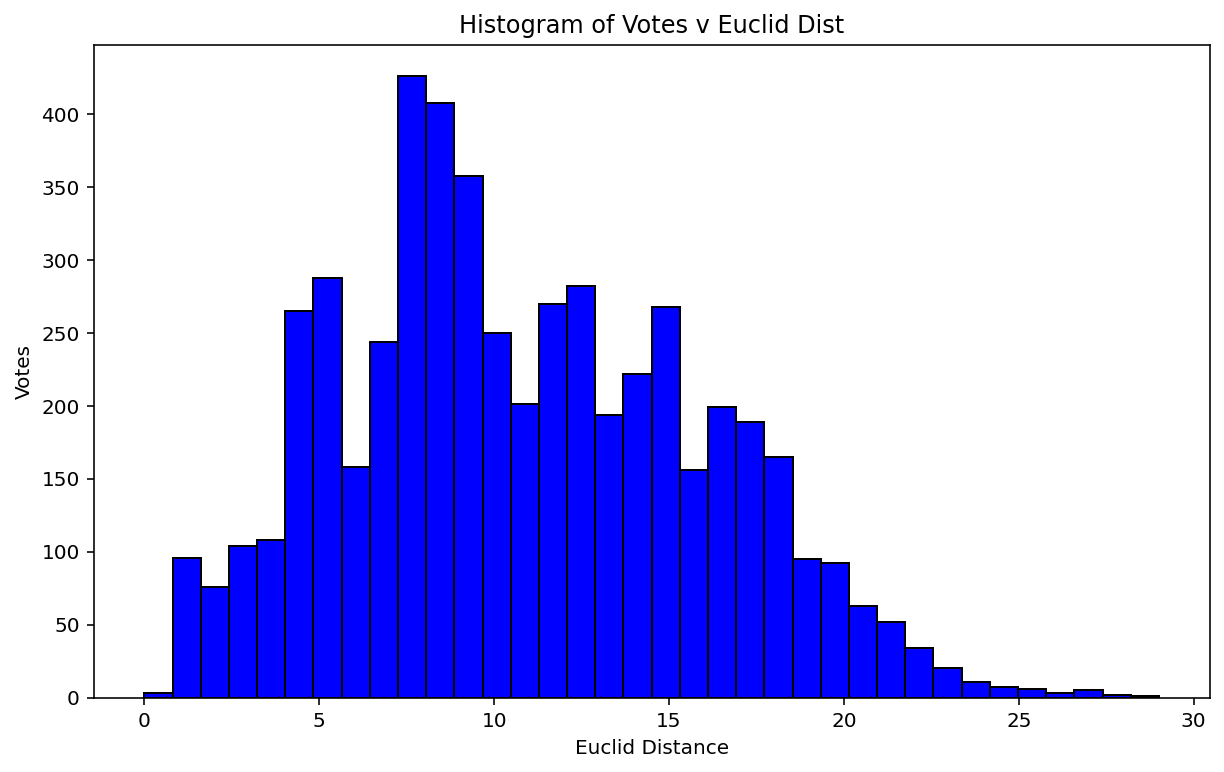

In [23]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
dfmh = pd.DataFrame()
dfmh = df.loc[df['maxValues']==5.0]

plt.hist(dfmh['Euclid Dist'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

dfh= pd.DataFrame()
dfh['maxValues'] = df['maxValues']
dfh['Euclid Dist'] = df['Euclid Dist']
dfh['Avg. Euc. Dist'] = df['Avg. Euc. Dist']

# Plot Histogram
#sns.histplot(data = dfh, x = dfh['Euclid Dist'], kde = True, hue = dfh['maxValues'])

# seaborn histogram
#sns.distplot(df['Euclid Dist'], hist=True, kde=False, 
#             bins=int(180/5), color = 'blue',
#             hist_kws={'edgecolor':'black'})

#sns.histplot(data = df['Euclid Dist'])

# Add labels
plt.title('Histogram of Votes v Euclid Dist')
plt.ylabel('Votes')
plt.xlabel('Euclid Distance')

/anaconda38/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


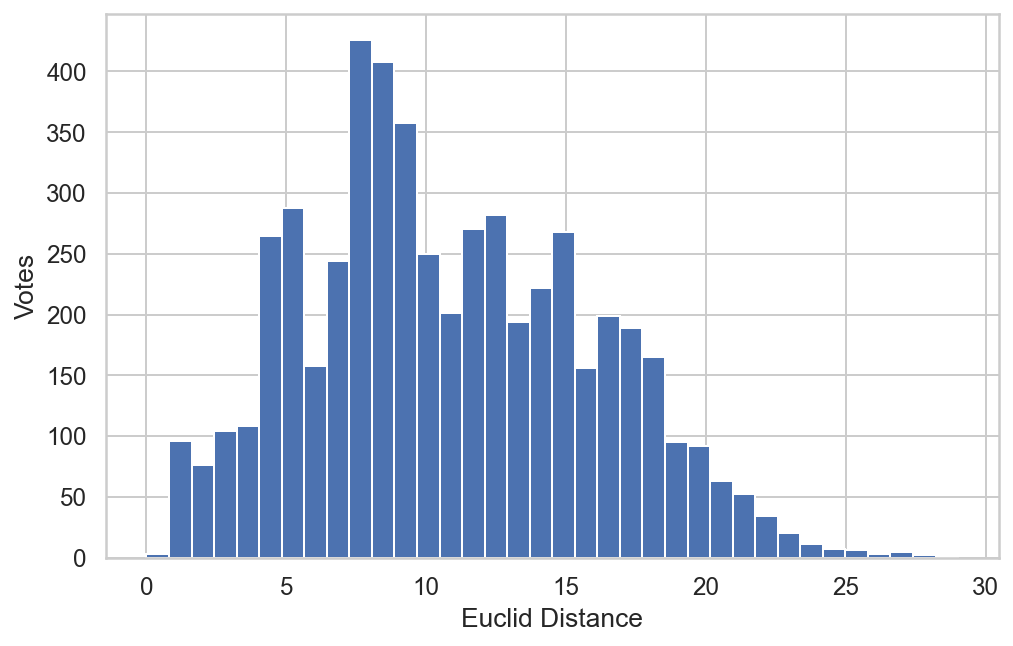

In [24]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    dfmh['Euclid Dist'], norm_hist=False, kde=False, bins=36, hist_kws={"alpha": 1}
).set(xlabel='Euclid Distance', ylabel='Votes');

In [25]:
df.fillna(0)
plist= list(df.columns)
plist2=plist[:-3]
print(plist2)
print(df[plist2].head())


['FF', 'FG', 'NP', 'FF.1', 'FG.1', 'FG.2', 'NPL', 'NP.1', 'NP.2', 'GP', 'NPR', 'SF', 'FF.2', 'LB', 'maxValues']
     FF   FG   NP  FF.1  FG.1  FG.2  NPL  NP.1  NP.2    GP   NPR    SF  FF.2  \
3   NaN  1.0  8.0   NaN   2.0   3.0  7.0   6.0   5.0   4.0   NaN   NaN   NaN   
4   1.0  4.0  7.0   2.0   5.0   8.0  9.0  10.0  11.0  12.0  13.0  14.0   3.0   
5   NaN  4.0  NaN   NaN   1.0   3.0  5.0   NaN   6.0   NaN   NaN   NaN   NaN   
6   NaN  1.0  NaN   7.0   2.0   3.0  6.0   NaN   NaN   5.0   NaN   NaN   NaN   
10  NaN  2.0  NaN   NaN   NaN   1.0  NaN   4.0   NaN   3.0   NaN   NaN   NaN   

     LB  maxValues  
3   NaN        8.0  
4   6.0       14.0  
5   2.0        6.0  
6   4.0        7.0  
10  5.0        5.0  


In [26]:
df.shape

(25101, 18)

In [27]:
#df['maxValues'].hist(bins=15, figsize=(15, 6), layout=(10335, 12));

In [28]:
# calculate the avg, mean median min and max of the euclidean distance for each preference 
dfeucmean =  df.groupby('maxValues')['Euclid Dist'].mean()
dfeucmedian =  df.groupby('maxValues')['Euclid Dist'].median()
#dfeucmode =  df.groupby('maxValues')['Euclid Dist'].mode() # no mode

In [29]:
dfeucmin =  df.groupby('maxValues')['Euclid Dist'].min()
dfeucmax =  df.groupby('maxValues')['Euclid Dist'].max()

In [30]:
#convert list to numpy array since lists seem to add at row 1 not 0
dfpref['Euc Mean'] = np.array(dfeucmean)
dfpref['Euc Median'] = np.array(dfeucmedian)
dfpref['Euc Min']  = np.array(dfeucmin)
dfpref['Euc Max']  = np.array(dfeucmax)

## Display the Statistics Table of the Vote

In [31]:
# displaying the dataframe
display(dfpref)

,Pref,Votes,Percentage,nPr,Unique Votes,Percentage Used,Euc Mean,Euc Median,Euc Min,Euc Max
0,1.0,3184,5.0,14,14,100.00000,0.000000,0.000000,0.000000,0.000000
1,2.0,4250,6.6,182,165,90.65934,3.239377,3.465545,0.000000,8.139410
2,3.0,21102,32.9,2184,1419,64.97253,6.433660,6.135145,0.000000,16.278821
3,4.0,12004,18.7,24024,3744,15.58442,9.085119,8.602325,0.000000,22.642782
4,5.0,8347,13.0,240240,5321,2.21487,10.802698,10.142782,0.000000,29.006743
5,6.0,4866,7.6,2162160,4249,0.19652,12.614716,12.237240,1.004988,31.730603
6,7.0,2627,4.1,17297280,2543,0.01470,14.474068,14.097625,3.465545,31.332631
7,8.0,1736,2.7,121080960,1703,0.00141,16.324969,15.813428,3.465545,37.235455
8,9.0,1053,1.6,726485760,1047,0.00014,18.283148,17.935873,4.470532,40.104326
9,10.0,880,1.4,3632428800,877,0.00002,21.353123,21.466574,4.470532,41.987933


### Write Statistics table to csv file

In [32]:
#filename and dir
out_csv='../data/stats/'+constituency+'_statistics.csv'

#write to csv file
dfpref.to_csv(out_csv)

### write out the dataframe with generated fields, categorise sequence as regular (1)

In [33]:
#add column with 
df['Seq']=1

#filename and dir
out_csv='../data/processed/'+constituency+'_reg.csv'
display(df.head(10))

#write to csv file
df.to_csv(out_csv)

,FF,FG,NP,FF.1,FG.1,FG.2,NPL,NP.1,NP.2,GP,NPR,SF,FF.2,LB,maxValues,Euclid Dist,Avg. Euc. Dist,Biggest Dist,Seq
3,NaN,1.0,8.0,NaN,2.0,3.0,7.0,6.0,5.0,4.0,NaN,NaN,NaN,NaN,8.0,8.600029,1.228576,6.363961,1
4,1.0,4.0,7.0,2.0,5.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,3.0,6.0,14.0,23.875911,1.836609,4.609772,1
5,NaN,4.0,NaN,NaN,1.0,3.0,5.0,NaN,6.0,NaN,NaN,NaN,NaN,2.0,6.0,11.512265,2.302453,4.301163,1
6,NaN,1.0,NaN,7.0,2.0,3.0,6.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,7.0,12.222640,2.037107,3.605551,1
10,NaN,2.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN,3.0,NaN,NaN,NaN,5.0,5.0,10.181168,2.545292,6.363961,1
13,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,4.0,NaN,NaN,4.0,6.845840,2.281947,4.609772,1
18,NaN,3.0,NaN,NaN,2.0,5.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,17.029085,4.257271,6.363961,1
22,NaN,2.0,NaN,1.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,6.0,6.0,23.931382,4.786276,8.139410,1
23,NaN,7.0,2.0,10.0,3.0,NaN,4.0,9.0,8.0,6.0,NaN,NaN,1.0,5.0,10.0,30.695153,3.410573,6.363961,1
26,4.0,NaN,NaN,3.0,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,6.0,6.0,8.076084,1.615217,3.605551,1


### Bar Plot of the Percentages of Preferenes Cast v Possible Preferences

In [34]:
# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

#create data frame for bar chart
plotdata = pd.DataFrame([], 
    index=pieLabels
)
plotdata['Cast']=list(dfpref['Unique Votes'])
plotdata['nPr']=list(dfpref['nPr'])

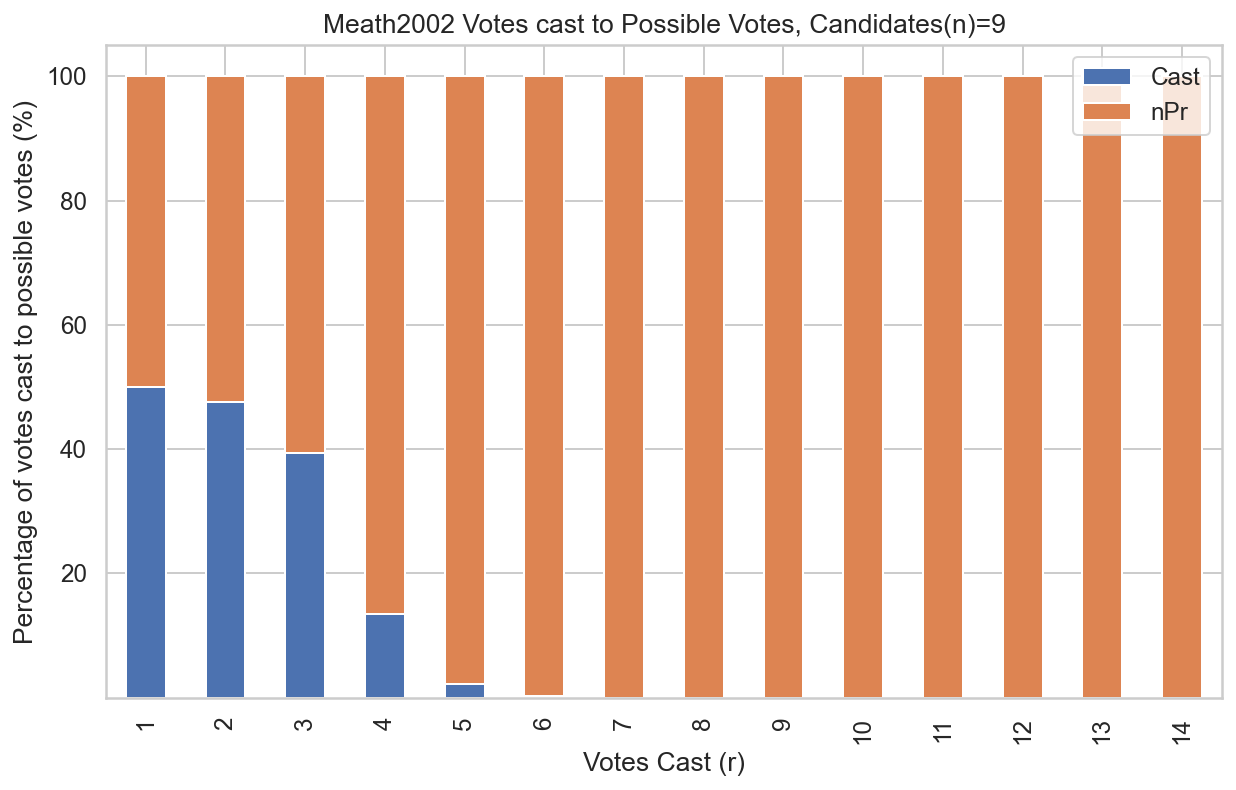

In [35]:
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title(constituency + " Votes cast to Possible Votes, Candidates(n)=9")
plt.xlabel("Votes Cast (r)")
plt.ylabel("Percentage of votes cast to possible votes (%)")

# Save the bar
plt.savefig('../images/'+constituency+'_pref_percent_bar.png')
plt.show()

In [36]:
print(dfpref['Euc Max'])

0      0.000000
1      8.139410
2     16.278821
3     22.642782
4     29.006743
5     31.730603
6     31.332631
7     37.235455
8     40.104326
9     41.987933
10    42.682435
11    44.168868
12    48.603117
13    51.250381
Name: Euc Max, dtype: float64


In [37]:
df.loc[(df['Avg. Euc. Dist'] > 5.0) & (df['maxValues']==7.0)]

,FF,FG,NP,FF.1,FG.1,FG.2,NPL,NP.1,NP.2,GP,NPR,SF,FF.2,LB,maxValues,Euclid Dist,Avg. Euc. Dist,Biggest Dist,Seq
2370,NaN,2.0,NaN,NaN,1.0,4.0,NaN,NaN,NaN,5.0,NaN,3.0,6.0,7.0,7.0,31.332631,5.222105,8.13941,1
4324,NaN,2.0,NaN,7.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,5.0,1.0,6.0,7.0,31.124551,5.187425,8.13941,1
45090,NaN,2.0,NaN,NaN,4.0,7.0,NaN,NaN,1.0,5.0,NaN,6.0,NaN,3.0,7.0,30.625409,5.104235,8.13941,1
50518,1.0,NaN,NaN,2.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,5.0,6.0,7.0,7.0,30.331848,5.055308,8.13941,1
51042,NaN,6.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,4.0,NaN,2.0,7.0,5.0,7.0,30.168796,5.028133,8.13941,1


In [38]:
df.loc[(df['Euclid Dist'] > 46.3) & (df['maxValues']==7.0)]

,FF,FG,NP,FF.1,FG.1,FG.2,NPL,NP.1,NP.2,GP,NPR,SF,FF.2,LB,maxValues,Euclid Dist,Avg. Euc. Dist,Biggest Dist,Seq


In [39]:
dfn = pd.DataFrame()
dfn['Preferences'] = dfpref['Pref']
dfn['Permutations(nPr)'] = dfpref['nPr']
dfn['Unique Votes'] = dfpref['Unique Votes']
dfn['Available Permutations'] = dfpref['nPr'] - dfpref['Unique Votes']
display(dfn)

,Preferences,Permutations(nPr),Unique Votes,Available Permutations
0,1.0,14,14,0
1,2.0,182,165,17
2,3.0,2184,1419,765
3,4.0,24024,3744,20280
4,5.0,240240,5321,234919
5,6.0,2162160,4249,2157911
6,7.0,17297280,2543,17294737
7,8.0,121080960,1703,121079257
8,9.0,726485760,1047,726484713
9,10.0,3632428800,877,3632427923
